# Fermentation Model for Ethanol Production

This notebook contains a mathematical model for ethanol production from glucose and xylose. The model is based on Monod kinetics and includes competitive inhibition effects.

## Model Description

The model simulates the fermentation process with the following components:
- **X**: Cell concentration (g/L)
- **Glu**: Glucose concentration (g/L) 
- **Xyl**: Xylose concentration (g/L)
- **Eth**: Ethanol concentration (g/L)

The model considers:
- Glucose consumption with Monod kinetics
- Xylose consumption with competitive inhibition by glucose
- Cell growth from both substrates
- Ethanol production from both glucose and xylose

In [10]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd

# Set up matplotlib for better plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

In [11]:
# Initial conditions for the model
X_0 = 0.5      # Initial cell concentration (g/L)
Glu_0 = 20.0   # Initial glucose concentration (g/L)
Xyl_0 = 10.0   # Initial xylose concentration (g/L)
Eth_0 = 0.0    # Initial ethanol concentration (g/L)

# Parameter values for the model
mimax_Glu = 0.2    # Maximum specific growth rate on glucose (1/h)
k_Glu = 10.0       # Monod constant for glucose (g/L)
mimax_Xyl = 0.05   # Maximum specific growth rate on xylose (1/h)
k_Xyl = 20.0       # Monod constant for xylose (g/L)
k_i = 40           # Inhibition constant for glucose on xylose consumption (L/g)
Y_X_Glu = 0.1      # Yield coefficient: cells from glucose (g/g)
Y_X_Xyl = 0.08     # Yield coefficient: cells from xylose (g/g)
Y_P_Glu = 0.4      # Yield coefficient: ethanol from glucose (g/g)
Y_P_Xyl = 0.2      # Yield coefficient: ethanol from xylose (g/g)
Y_P_X = 0.1        # Yield coefficient: ethanol from cells (g/g)

# Time parameters
t0 = 0.0          # Initial time (h)
tn = 72.0         # Final time (h)
himp = 1.0        # Time step for output (h)

print("Model parameters initialized successfully!")
print(f"Simulation time: {t0} to {tn} hours")
print(f"Initial conditions: X={X_0}, Glu={Glu_0}, Xyl={Xyl_0}, Eth={Eth_0}")

Model parameters initialized successfully!
Simulation time: 0.0 to 72.0 hours
Initial conditions: X=0.5, Glu=20.0, Xyl=10.0, Eth=0.0


In [12]:
def fermentation_model(y, t):
    """
    Fermentation model differential equations
    
    Parameters:
    y: array of state variables [X, Glu, Xyl, Eth]
    t: time (h)
    
    Returns:
    dy: array of derivatives [dX/dt, dGlu/dt, dXyl/dt, dEth/dt]
    """
    # Extract state variables
    X = y[0]     # Cell concentration (g/L)
    Glu = y[1]   # Glucose concentration (g/L)
    Xyl = y[2]   # Xylose concentration (g/L)
    Eth = y[3]   # Ethanol concentration (g/L)
    
    # Calculate specific growth rates
    r1 = mimax_Glu * (Glu / (k_Glu + Glu))  # Specific growth rate on glucose
    r2 = mimax_Xyl * (Xyl / (k_Xyl + Xyl)) * (1 / (1 + Glu * k_i))  # Specific growth rate on xylose with glucose inhibition
    
    # Mass balance equations
    dX = r1 * X + r2 * X                                    # Cell concentration
    dGlu = -1/Y_X_Glu * r1 * X                              # Glucose concentration
    dXyl = -1/Y_X_Xyl * r2 * X                              # Xylose concentration
    dEth = Y_P_Glu/Y_P_X * r1 * X + Y_P_Xyl/Y_P_X * r2 * X  # Ethanol concentration
    
    return [dX, dGlu, dXyl, dEth]

print("Fermentation model function defined successfully!")

Fermentation model function defined successfully!


In [13]:
# Set up time vector and initial conditions
t = np.arange(t0, tn + himp, himp)  # Time vector
y0 = [X_0, Glu_0, Xyl_0, Eth_0]     # Initial conditions vector

# Solve the system of differential equations using Runge-Kutta method
print("Solving the fermentation model...")
solution = odeint(fermentation_model, y0, t)

# Extract solutions for each variable
X_solution = solution[:, 0]    # Cell concentration
Glu_solution = solution[:, 1]  # Glucose concentration
Xyl_solution = solution[:, 2]  # Xylose concentration
Eth_solution = solution[:, 3]  # Ethanol concentration

# Create a DataFrame for easier data handling
results_df = pd.DataFrame({
    'Time (h)': t,
    'Cell concentration (g/L)': X_solution,
    'Glucose concentration (g/L)': Glu_solution,
    'Xylose concentration (g/L)': Xyl_solution,
    'Ethanol concentration (g/L)': Eth_solution
})

print("Model solved successfully!")
print(f"Final concentrations at t = {tn} h:")
print(f"  Cells: {X_solution[-1]:.3f} g/L")
print(f"  Glucose: {Glu_solution[-1]:.3f} g/L")
print(f"  Xylose: {Xyl_solution[-1]:.3f} g/L")
print(f"  Ethanol: {Eth_solution[-1]:.3f} g/L")

Solving the fermentation model...
Model solved successfully!
Final concentrations at t = 72.0 h:
  Cells: 3.286 g/L
  Glucose: -0.000 g/L
  Xylose: 0.172 g/L
  Ethanol: 9.572 g/L


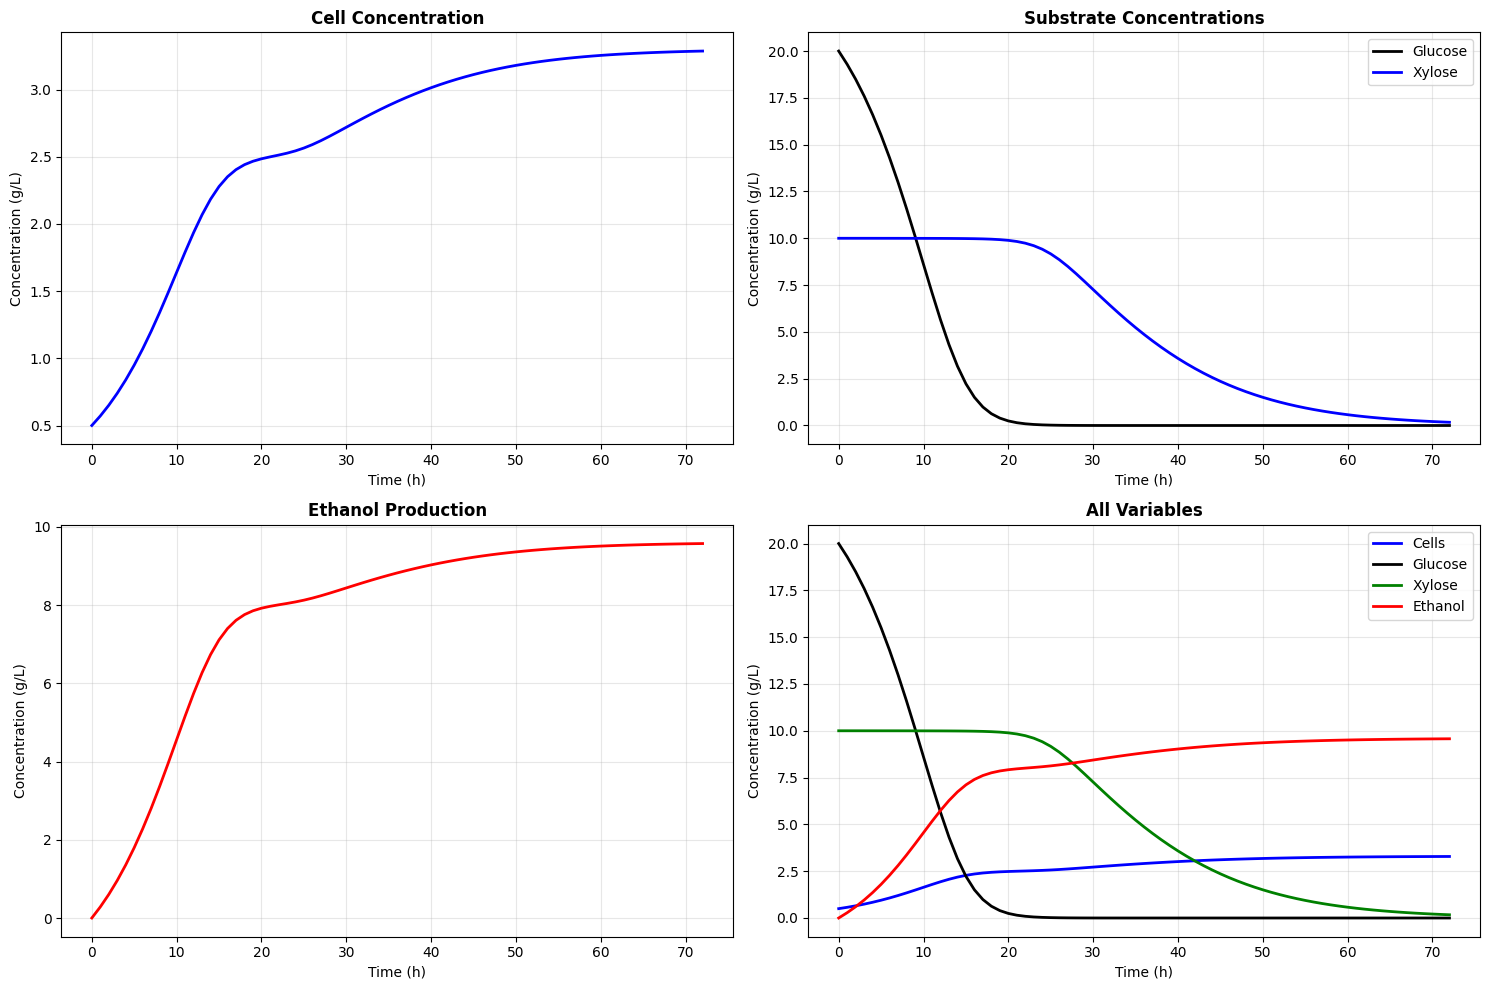


Simulation Results (First 10 time points):
 Time (h)  Cell concentration (g/L)  Glucose concentration (g/L)  Xylose concentration (g/L)  Ethanol concentration (g/L)
      0.0                  0.500000                    20.000000                   10.000000                     0.000000
      1.0                  0.570880                    19.291315                    9.999858                     0.283497
      2.0                  0.650664                    18.493612                    9.999690                     0.602605
      3.0                  0.740053                    17.599883                    9.999490                     0.960129
      4.0                  0.839634                    16.604263                    9.999250                     1.358415
      5.0                  0.949791                    15.502925                    9.998961                     1.798996
      6.0                  1.070582                    14.295292                    9.998608          

In [14]:
# Comprehensive plot: All variables in one figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Cell concentration
ax1.plot(t, X_solution, 'b-', linewidth=2)
ax1.set_title('Cell Concentration', fontweight='bold')
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('Concentration (g/L)')
ax1.grid(True, alpha=0.3)

# Substrates (Glucose and Xylose)
ax2.plot(t, Glu_solution, 'k-', linewidth=2, label='Glucose')
ax2.plot(t, Xyl_solution, 'b-', linewidth=2, label='Xylose')
ax2.set_title('Substrate Concentrations', fontweight='bold')
ax2.set_xlabel('Time (h)')
ax2.set_ylabel('Concentration (g/L)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Ethanol production
ax3.plot(t, Eth_solution, 'r-', linewidth=2)
ax3.set_title('Ethanol Production', fontweight='bold')
ax3.set_xlabel('Time (h)')
ax3.set_ylabel('Concentration (g/L)')
ax3.grid(True, alpha=0.3)

# All variables together
ax4.plot(t, X_solution, 'b-', linewidth=2, label='Cells')
ax4.plot(t, Glu_solution, 'k-', linewidth=2, label='Glucose')
ax4.plot(t, Xyl_solution, 'g-', linewidth=2, label='Xylose')
ax4.plot(t, Eth_solution, 'r-', linewidth=2, label='Ethanol')
ax4.set_title('All Variables', fontweight='bold')
ax4.set_xlabel('Time (h)')
ax4.set_ylabel('Concentration (g/L)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display results table (first and last 10 rows)
print("\nSimulation Results (First 10 time points):")
print(results_df.head(10).to_string(index=False))
print("\nSimulation Results (Last 10 time points):")
print(results_df.tail(10).to_string(index=False))

## Model Analysis and Key Results

The fermentation model demonstrates several important characteristics:

1. **Sequential substrate utilization**: The model shows preferential consumption of glucose over xylose due to the competitive inhibition term in the xylose consumption rate.

2. **Growth phases**: The cell growth follows typical fermentation patterns with exponential growth during substrate availability.

3. **Product formation**: Ethanol production is coupled to both substrate consumption and cell growth.

4. **Inhibition effects**: The glucose inhibition on xylose consumption is clearly visible in the simulation results.

In [15]:
# Calculate key performance indicators
total_substrate_consumed = (Glu_0 - Glu_solution[-1]) + (Xyl_0 - Xyl_solution[-1])
ethanol_yield = Eth_solution[-1] / total_substrate_consumed
cell_yield = X_solution[-1] / total_substrate_consumed
substrate_conversion = (total_substrate_consumed / (Glu_0 + Xyl_0)) * 100

# Calculate substrate utilization rates
glucose_conversion = ((Glu_0 - Glu_solution[-1]) / Glu_0) * 100
xylose_conversion = ((Xyl_0 - Xyl_solution[-1]) / Xyl_0) * 100

print("=== FERMENTATION MODEL PERFORMANCE METRICS ===")
print(f"Simulation duration: {tn} hours")
print(f"\nSubstrate Utilization:")
print(f"  Glucose conversion: {glucose_conversion:.1f}%")
print(f"  Xylose conversion: {xylose_conversion:.1f}%")
print(f"  Total substrate conversion: {substrate_conversion:.1f}%")

print(f"\nProduct Formation:")
print(f"  Final ethanol concentration: {Eth_solution[-1]:.3f} g/L")
print(f"  Ethanol yield: {ethanol_yield:.3f} g ethanol/g substrate")
print(f"  Cell yield: {cell_yield:.3f} g cells/g substrate")

print(f"\nFinal Concentrations:")
print(f"  Cells: {X_solution[-1]:.3f} g/L")
print(f"  Residual glucose: {Glu_solution[-1]:.3f} g/L")
print(f"  Residual xylose: {Xyl_solution[-1]:.3f} g/L")
print(f"  Ethanol: {Eth_solution[-1]:.3f} g/L")

# Export results to CSV file (optional)
results_df.to_csv('fermentation_results.csv', index=False)
print(f"\nResults exported to 'fermentation_results.csv'")

=== FERMENTATION MODEL PERFORMANCE METRICS ===
Simulation duration: 72.0 hours

Substrate Utilization:
  Glucose conversion: 100.0%
  Xylose conversion: 98.3%
  Total substrate conversion: 99.4%

Product Formation:
  Final ethanol concentration: 9.572 g/L
  Ethanol yield: 0.321 g ethanol/g substrate
  Cell yield: 0.110 g cells/g substrate

Final Concentrations:
  Cells: 3.286 g/L
  Residual glucose: -0.000 g/L
  Residual xylose: 0.172 g/L
  Ethanol: 9.572 g/L

Results exported to 'fermentation_results.csv'
